# 0.0. IMPORTS

In [1]:
import pandas as pd
import inflection
import math
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

from IPython.display import Image


## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [4]:
df_sales_raw = pd.read_csv('~/repos/DataScience_em_Producao/dataset/train.csv', low_memory = False)
df_store_raw = pd.read_csv('~/repos/DataScience_em_Producao/dataset/store.csv', low_memory = False)

#merge 
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')

# 1.0. DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))


#rename
df1.columns = cols_new


## 1.2. Data Dimensions

In [7]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## 1.3. Data Types

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [10]:
df1['competition_distance'].max()

75860.0

In [11]:
#competition_distance
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis =1)

#competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)


#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis =1)

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis =1)


#promo_interval
month_map = {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec',}

df1['promo_interval'].fillna(0, inplace = True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)

In [12]:
df1.sample(5).T

,858581,422855,642706,731538,671737
store,817,1056,137,884,178
day_of_week,4,3,1,6,3
date,2013-05-23 00:00:00,2014-06-18 00:00:00,2013-12-02 00:00:00,2013-09-14 00:00:00,2013-11-06 00:00:00
sales,25265,4980,12311,4078,11691
customers,3929,444,1228,455,1011
open,1,1,1,1,1
promo,0,1,1,0,1
state_holiday,0,0,0,0,0
school_holiday,0,1,0,0,0
store_type,a,d,a,d,d


In [13]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Type

In [14]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7. Descriptive Statistical

In [15]:
num_attributes = df1.select_dtypes( include = ('int64','float64') )
cat_attributes = df1.select_dtypes( exclude = ('int64','float64', 'datetime64[ns]') )

## 1.7.1 Numerical Attributes

In [16]:
# Central Tendency: mean, median

ct1 = pd.DataFrame(num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame(num_attributes.apply( np.median ) ).T


#Dispersion: std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply( np.std) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() -x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T     

                  
#Concatenate

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [17]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/home/samuel/.pyenv/versions/DataScienceEmProducao/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance'>

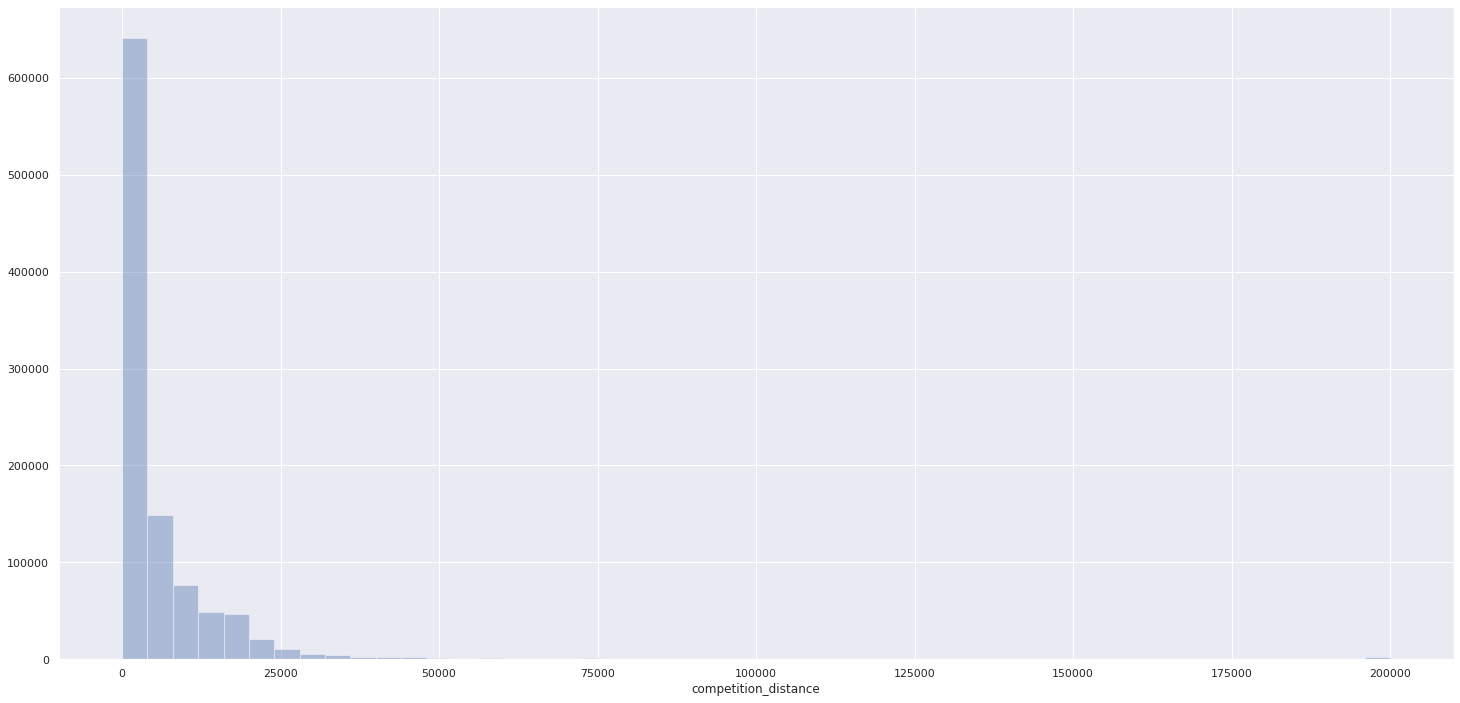

In [18]:
sns.distplot(df1['competition_distance'], kde = False)

## 1.7.2 Categorical Attributes

In [19]:
cat_attributes.apply( lambda x: x.unique().shape ).T

,0
state_holiday,4
store_type,4
assortment,3
promo_interval,4
month_map,12


<AxesSubplot:xlabel='assortment', ylabel='sales'>

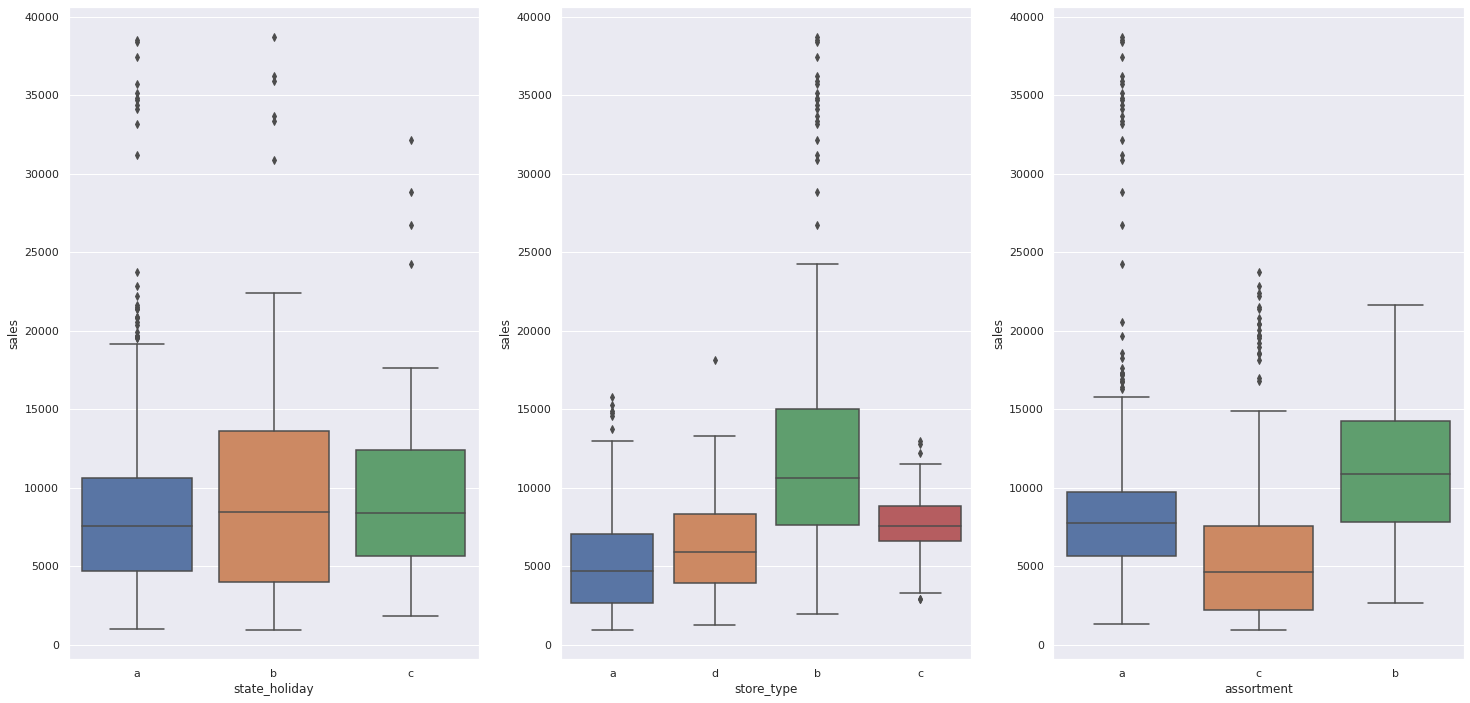

In [20]:
aux1 = df1[(df1['state_holiday']!= '0') & ( df1['sales'] > 0)]

plt.subplot (1,3,1)
sns.boxplot( x= 'state_holiday',y= 'sales', data= aux1)

plt.subplot (1,3,2)
sns.boxplot( x= 'store_type',y= 'sales', data= aux1)

plt.subplot (1,3,3)
sns.boxplot( x= 'assortment',y= 'sales', data= aux1)



# 2.0 FEATURES ENGINEERING

In [21]:
df2 = df1.copy()

## 2.1 Mind Map Hypothesis

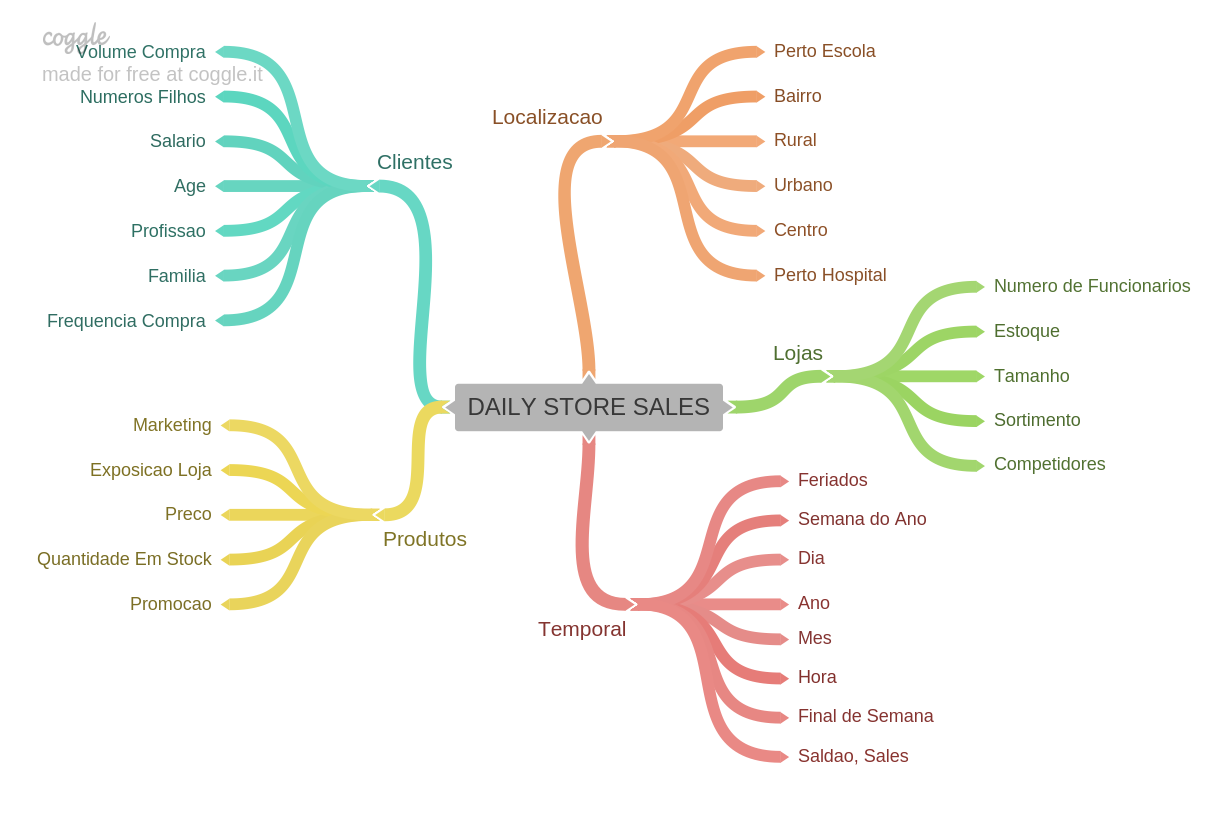

In [22]:
Image('/home/samuel/repos/DataScience_em_Producao/img/MindMapHypothesis.png')

## 2.2 Creating Hypothesis

### 2.2.1 Store Hypothesis



**1.** The highier employee number, the highier sales.

**2.** The bigger stock, the highier sales.

**3.** The bigger shop, the highier sales.

**4.** The bigger assortment, the highier sales.

**5.** The highier competitor number, the lower sales.

**6.** The longer competition, the highier sales.


### 2.2.2 Product Hypothesis

**1.** The highier Marketing budget, the highier sales.

**2.** The highier exposure, the highier sales.

**3.** The lower price, the highier sales.

**5.** The bigger dicount, the highier sales.

**6.** The longer promotion, the highier sales.

**7.** The more promotion days, the highier sales.

**8.** The more sequential promotions, the highier sales.

### 2.2.3 Time Hypothesis



**1.** Stores open on Christmas should have highier sales.

**2.** Sales should encrease over years.

**3.** Sales should encrease after halfyear.

**4.** Sales should encrease after the 10th days of every month.

**5.** Sales should decrease on weekends.

**6.** Sales should decrease on school holidays.


## 2.3 Hypothesis Final List



**1.** The bigger assortment, the highier sales.

**2.** The highier competitor number, the lower sales.

**3.** The longer competition, the highier sales.

**4.** The longer promotion, the highier sales.

**5.** The more promotion days, the highier sales.

**6.** The more sequential promotions, the highier sales.

**7.** Stores open on Christmas should have highier sales.

**8.** Sales should encrease over years.

**9.** Sales should encrease after halfyear.

**10.** Sales should encrease after the 10th days of every month.

**11.** Sales should decrease on weekends.

**12.** Sales should decrease on school holidays.


## 2.4 Features Engineering

In [23]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W')

#competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year= x['competition_open_since_year'], month= x['competition_open_since_month'], day=1), axis = 1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply( lambda x: x.days).astype( int ) 


# promo since
df2['promo_since'] = df2['promo2_since_year'].astype (str) + '-' + df2['promo2_since_week'].astype (str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta( days =7))

df2['promo_time_week'] = ((df2['date']- df2['promo_since'])/7).apply(lambda x: x.days ).astype (int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x=='b' else 'extended')

# state holiday

df2['state_holiday'] = df2['state_holiday'].apply(lambda x:'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [24]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 VARIABLES FILTERING

In [25]:
df3 = df2.copy()

## 3.1  Row Filtering

In [26]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0 )]

## 3.2 Columns Selection

In [27]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis =1 )

In [28]:
df3.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 4.0 EXPLORATORY DATA ANALYSIS

In [29]:
df4 = df3.copy()

In [30]:
df4[df4['state_holiday'] == 'regular_day'].head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 4.1 Univariate Analysis

### 4.1.1 Response Variable

/home/samuel/.pyenv/versions/DataScienceEmProducao/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

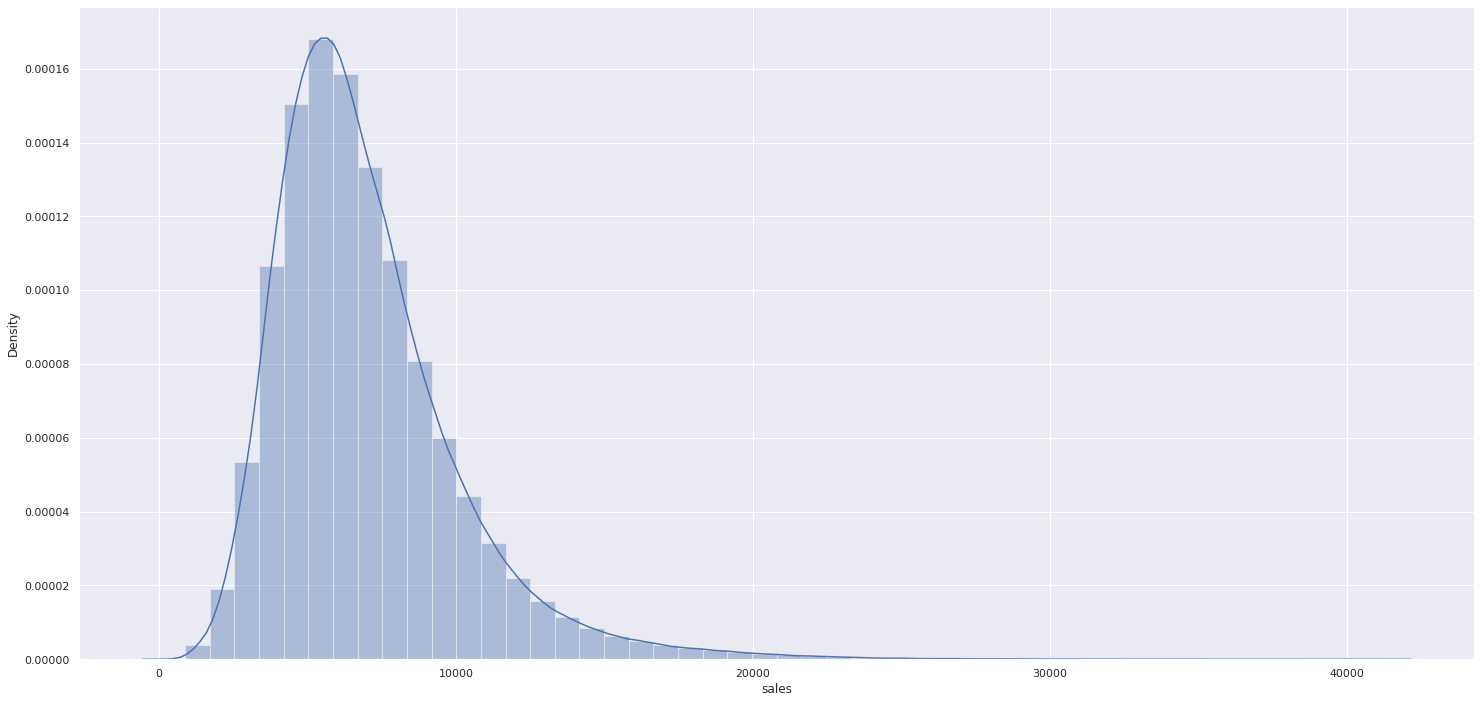

In [31]:
sns.distplot(df4['sales'])

### 4.1.2 Numerical Variable

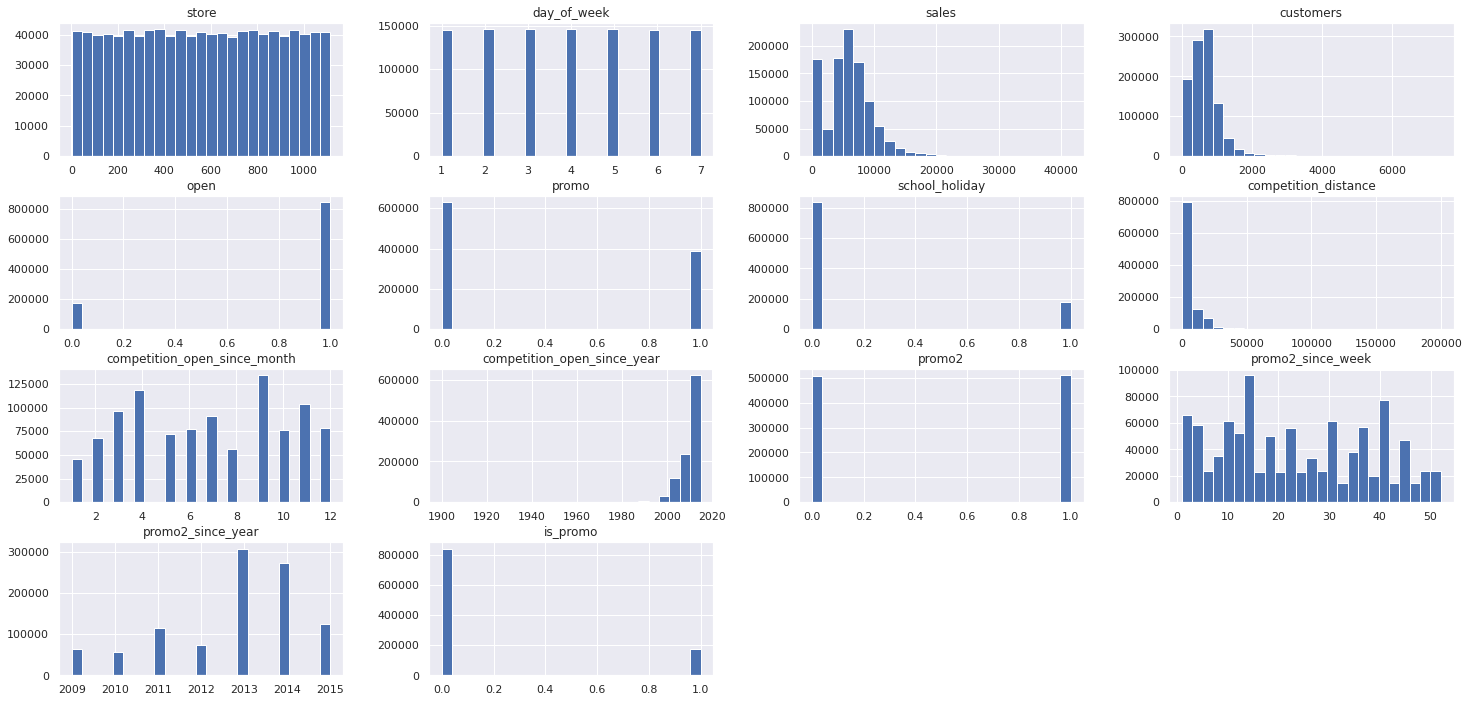

In [32]:
num_attributes.hist(bins = 25);

### 4.1.3 Categorical Variable

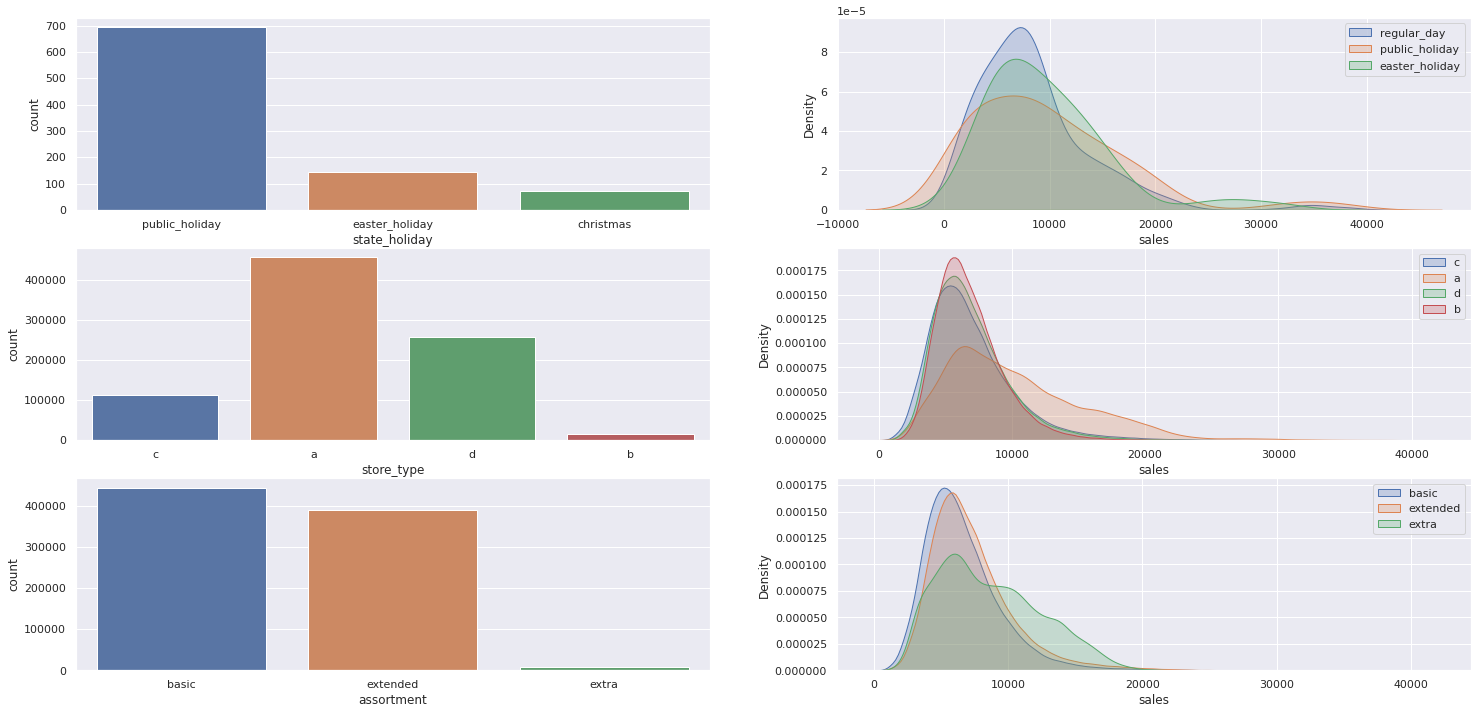

In [33]:
# state holiday

plt.subplot(3,2,1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( x = 'state_holiday', data = a )

plt.subplot(3,2,2)
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], shade = True)
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], shade = True)
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], shade = True)
plt.legend(df4['state_holiday'].drop_duplicates());

# store type

plt.subplot(3,2,3)
sns.countplot( x = 'store_type', data = df4 )

plt.subplot(3,2,4)
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], shade = True)
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], shade = True)
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], shade = True)
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], shade = True)
plt.legend(df4['store_type'].drop_duplicates());


# assortment

plt.subplot(3,2,5)
sns.countplot( x = 'assortment', data = df4 )

plt.subplot(3,2,6)
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], shade = True)
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], shade = True)
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], shade = True)
plt.legend(df4['assortment'].drop_duplicates());


## 4.2 Bivariate Analysis

### H1. The bigger assortment, the highier sales.

**FALSE** The bigger assortment, the **lower** sales


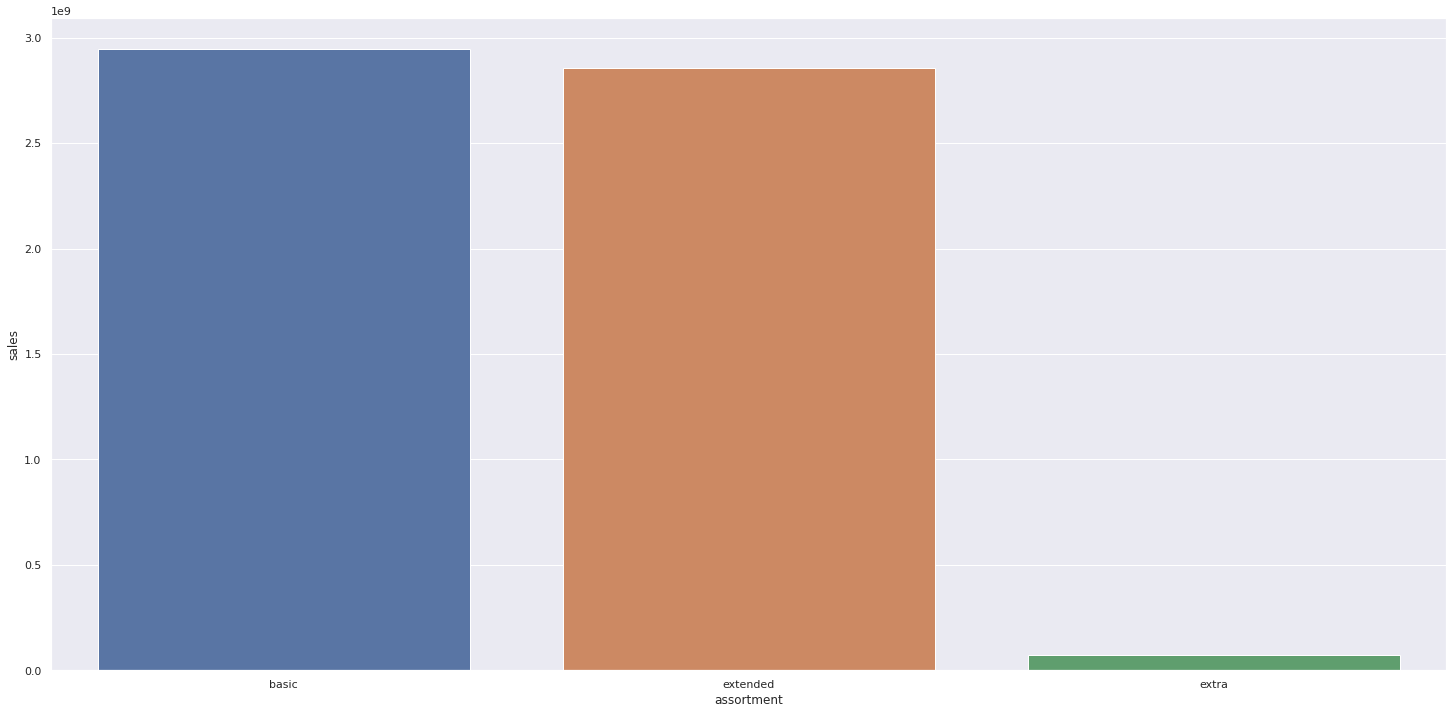

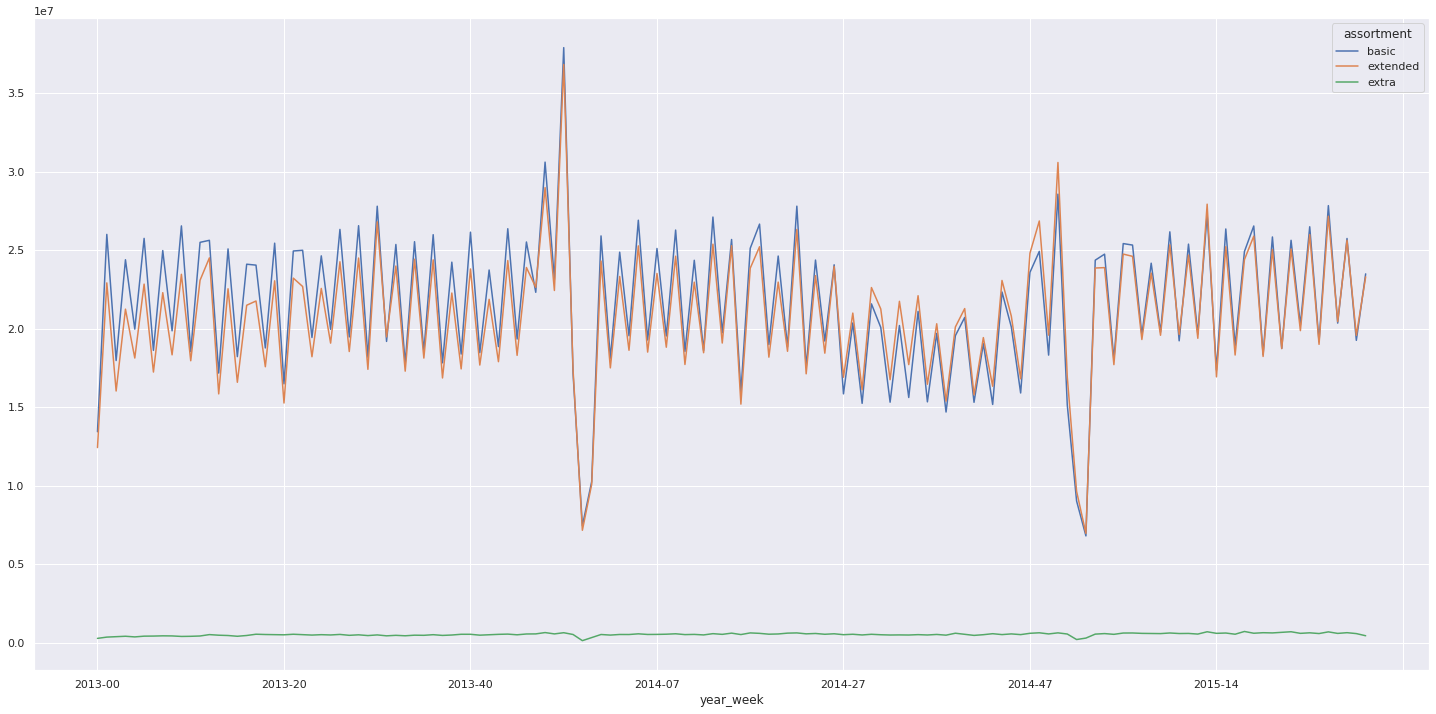

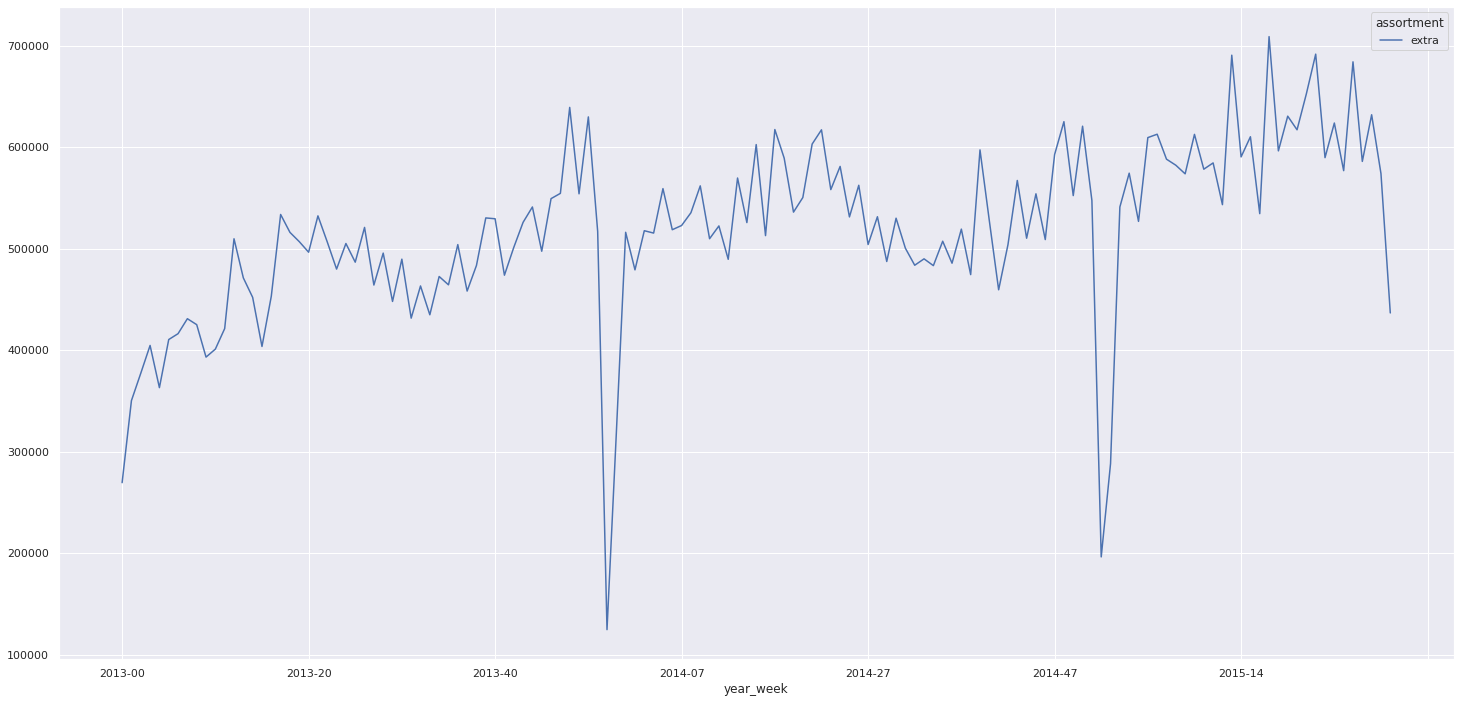

In [34]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1);

aux2 = df4[[ 'year_week', 'assortment','sales']].groupby( ['year_week', 'assortment'] ).sum().reset_index()
aux2.pivot ( index= 'year_week', columns= 'assortment' , values= 'sales' ).plot();


aux3 = aux2[aux2[ 'assortment'] == 'extra']
aux3.pivot ( index= 'year_week', columns= 'assortment' , values= 'sales' ).plot();

### H2. The highier competitor number, the lower sales.
**FALSE** The highier competitor number, the **highier** sales

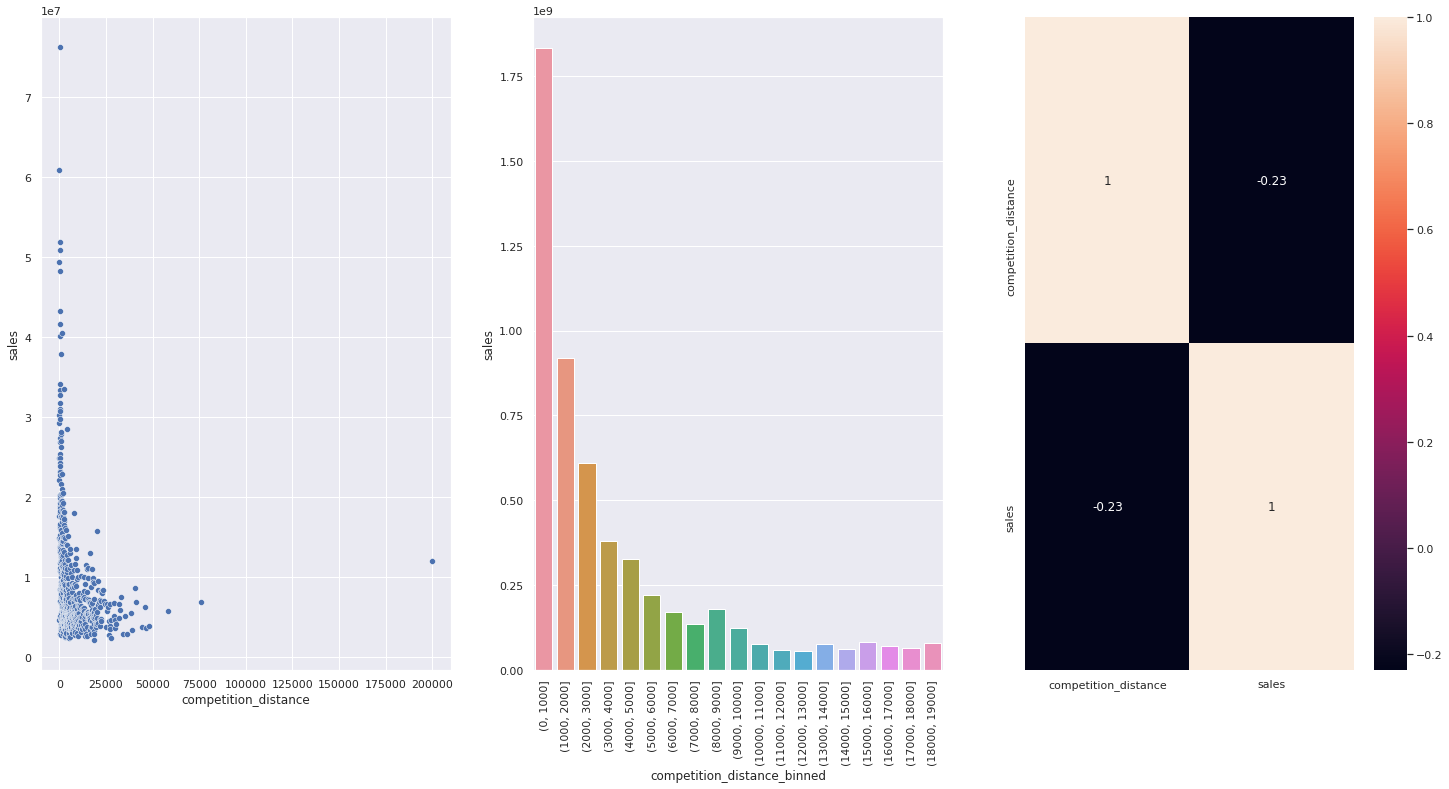

In [35]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot( 1,3,1)
sns.scatterplot(x= 'competition_distance' , y = 'sales', data = aux1);

plt.subplot( 1,3,2)
bins = list( np.arange( 0, 20000, 1000))
aux1[ 'competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot( x = 'competition_distance_binned', y = 'sales', data = aux2);
plt.xticks( rotation = 90)

plt.subplot( 1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True);

### H3. The longer competition, the highier sales.
**FALSE** The longer competition, the **lower** sales

<AxesSubplot:>

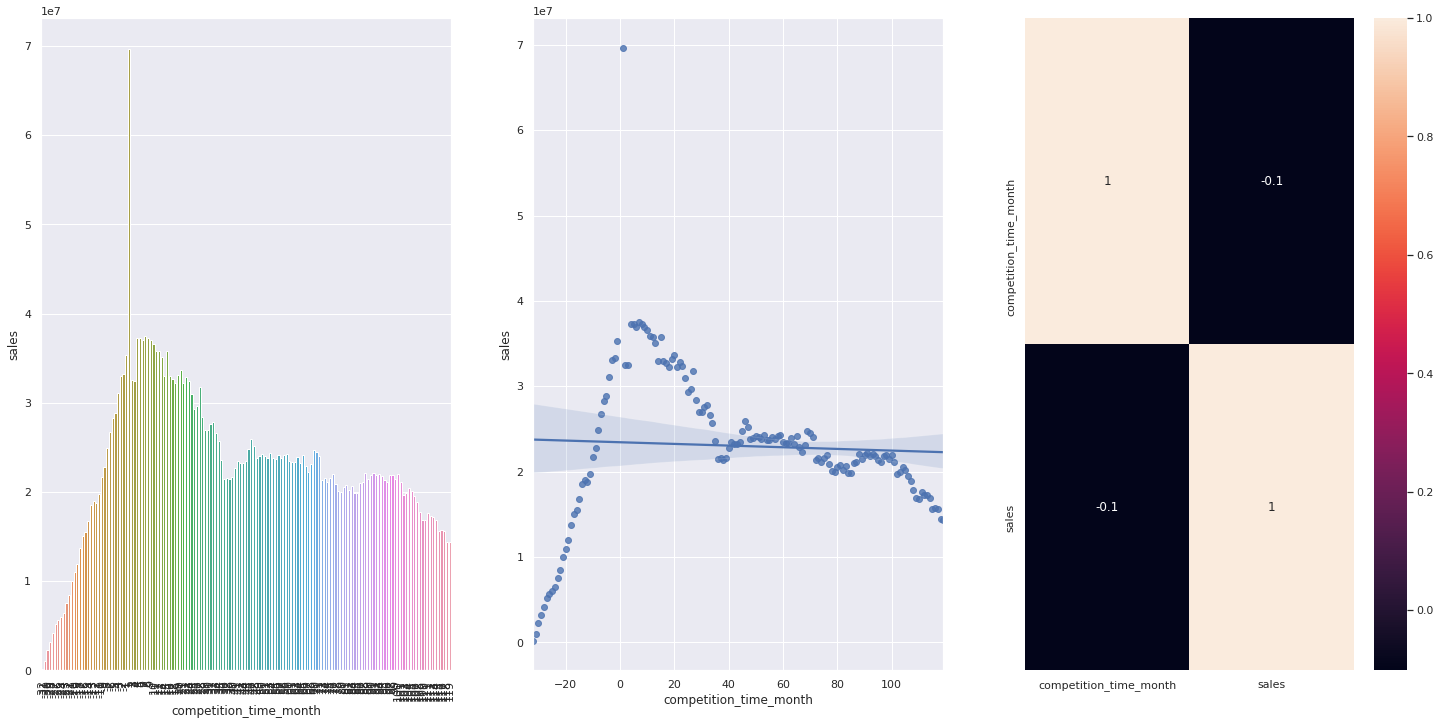

In [41]:
plt.subplot( 1,3,1)
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & ( aux1['competition_time_month'] != 0 )]
sns.barplot( x = 'competition_time_month', y = 'sales', data = aux2);
plt.xticks( rotation =90);

plt.subplot( 1,3,2)
sns.regplot( x = 'competition_time_month', y = 'sales', data = aux2);

plt.subplot(1,3,3)
sns.heatmap( aux1.corr(method = 'pearson'), annot = True)

### H4. The longer promotion, the highier sales.
**FALSE** Sales decrease after a while of promo period

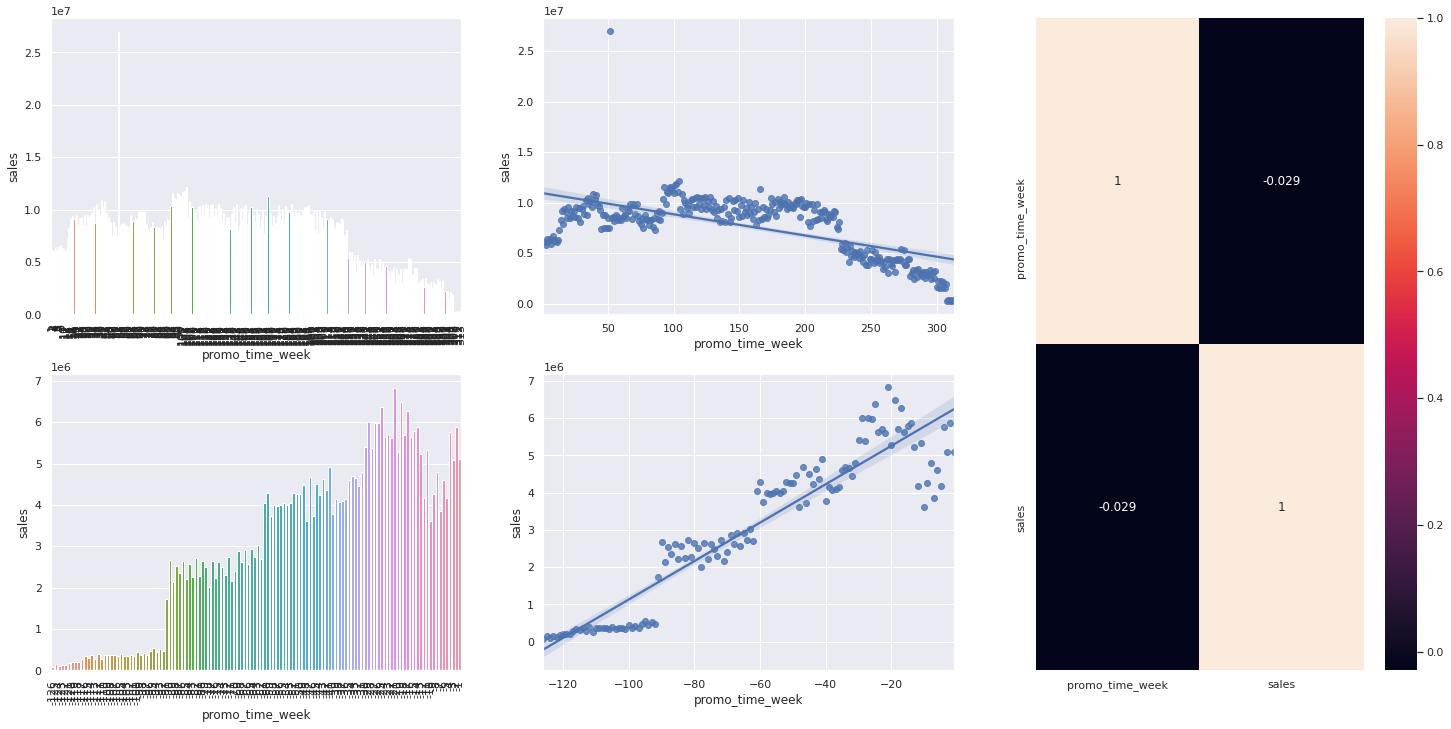

In [50]:
aux1 = df4[['promo_time_week', 'sales']].groupby( 'promo_time_week').sum().reset_index()

grid = GridSpec( 2, 3)

plt.subplot( grid[0,0] )
aux2 = aux1[aux1['promo_time_week'] > 0]  # promo_2
sns.barplot( x = 'promo_time_week', y = 'sales', data = aux2);
plt.xticks( rotation = 90);

plt.subplot(  grid[0,1] )
sns.regplot( x = 'promo_time_week', y = 'sales', data = aux2);

plt.subplot( grid[1,0] )
aux3 = aux1[aux1['promo_time_week'] < 0]  # regular promo
sns.barplot( x = 'promo_time_week', y = 'sales', data = aux3);
plt.xticks( rotation = 90);

plt.subplot( grid[1,1] )
sns.regplot( x = 'promo_time_week', y = 'sales', data = aux3);

plt.subplot( grid[:,2] )
sns.heatmap( aux1.corr( method = 'pearson'), annot = True);

### <s>H5. The more promotion days, the highier sales.</s>

### H6. The more sequential promotions, the highier sales. 
**FALSE** The more sequential promotions, the **lower** sales

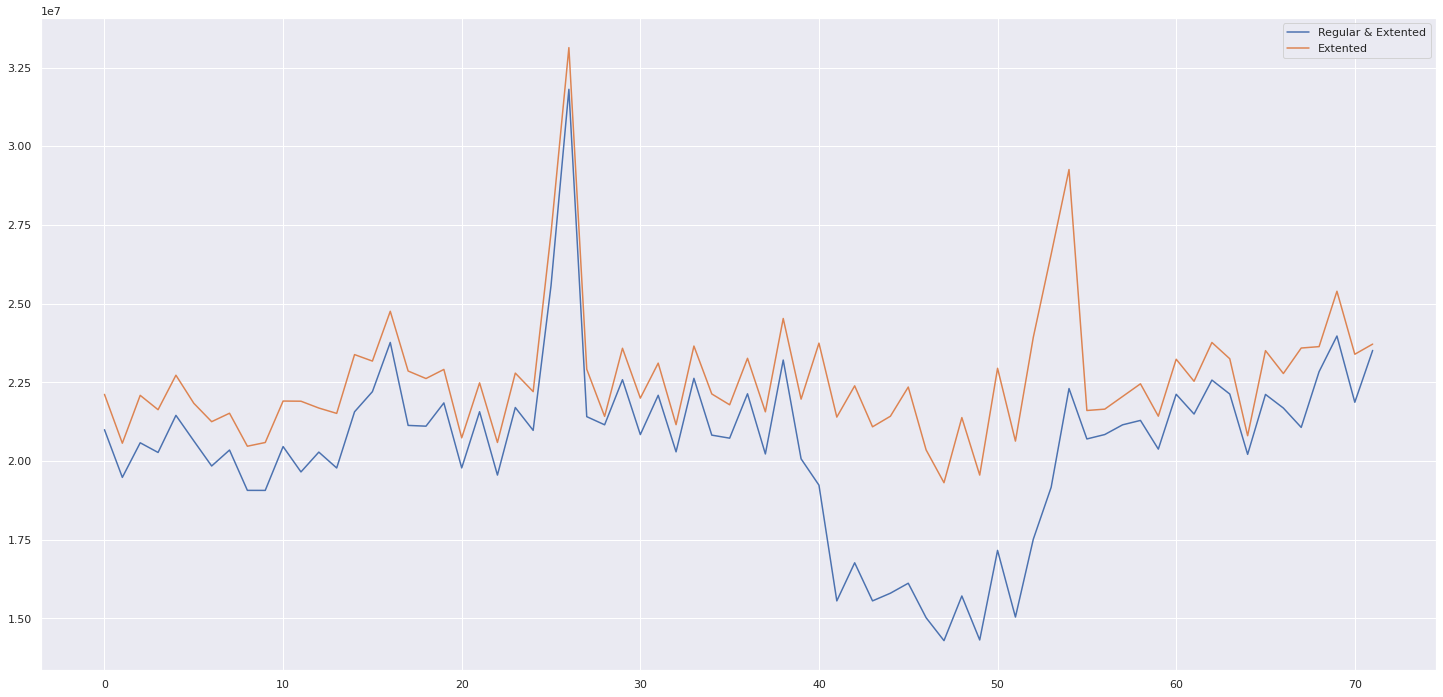

In [56]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']].groupby( 'year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week', 'sales']].groupby( 'year_week').sum().reset_index()
aux2.plot( ax = ax)

ax.legend( labels = ['Regular & Extented', 'Extented'])

### H7. Stores open on Christmas should have highier sales.
**FALSE** Stores open on Christmas sell less than other holidays

<AxesSubplot:xlabel='year', ylabel='sales'>

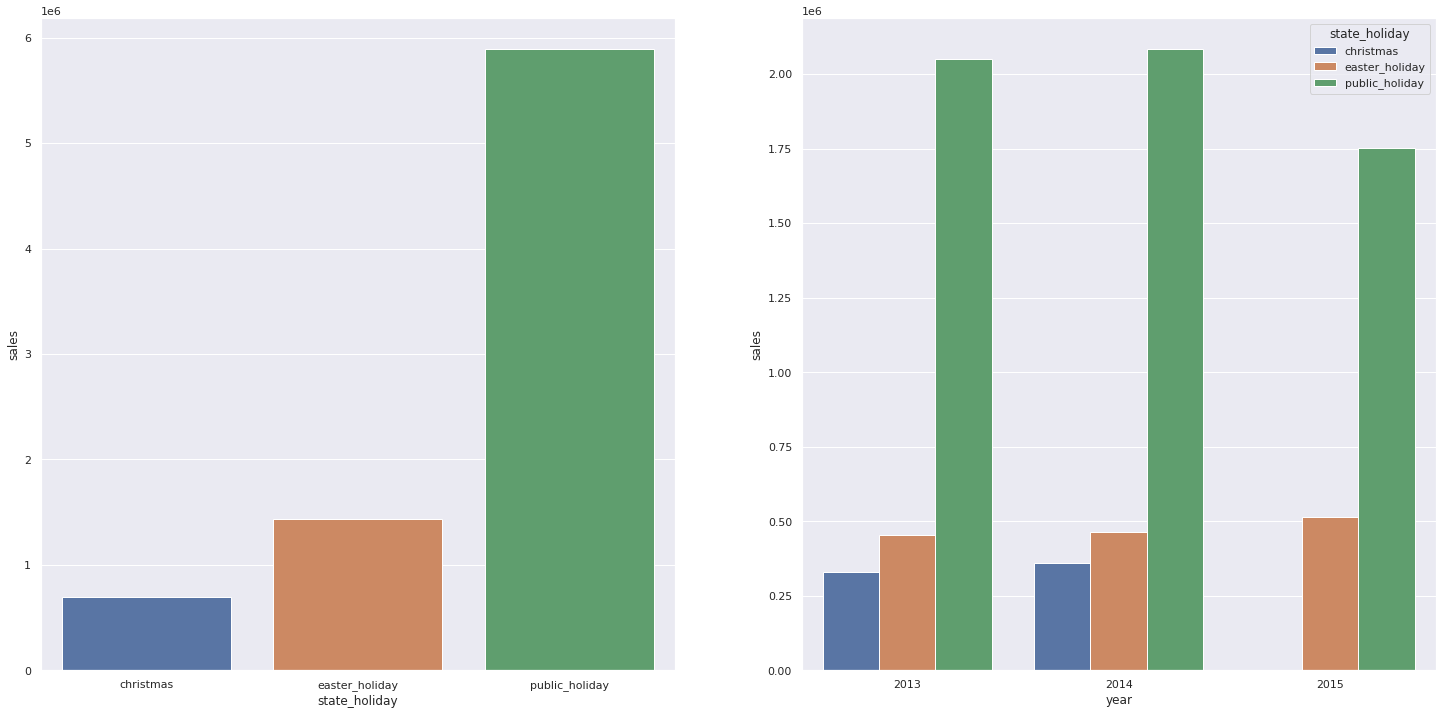

In [63]:
aux = df4[ df4['state_holiday'] != 'regular_day']

plt.subplot( 1,2,1)
aux1 = aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot( x= 'state_holiday', y = 'sales', data = aux1);

plt.subplot( 1,2,2)
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday']).sum().reset_index()
sns.barplot( x = 'year', y = 'sales', hue = 'state_holiday', data = aux2)

### H8. Sales should encrease over years.
**FALSE** Sales is decreasing over years

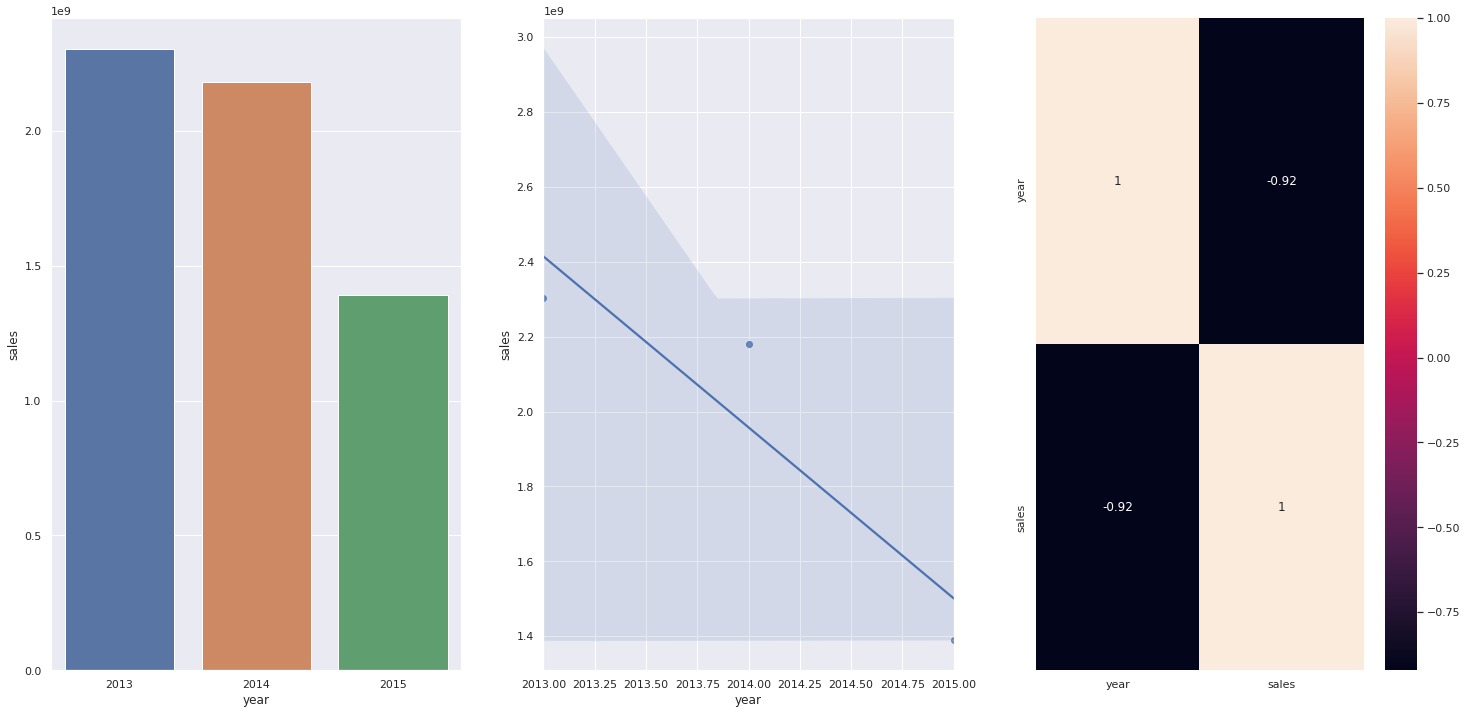

In [67]:
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

plt.subplot( 1,3,1)
sns.barplot( x= 'year', y = 'sales', data = aux1);

plt.subplot( 1,3,2)
sns.regplot( x= 'year', y = 'sales', data = aux1);

plt.subplot( 1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True);

### H9. Sales should encrease after halfyear.
**FALSE** Sales decrease after halfyear

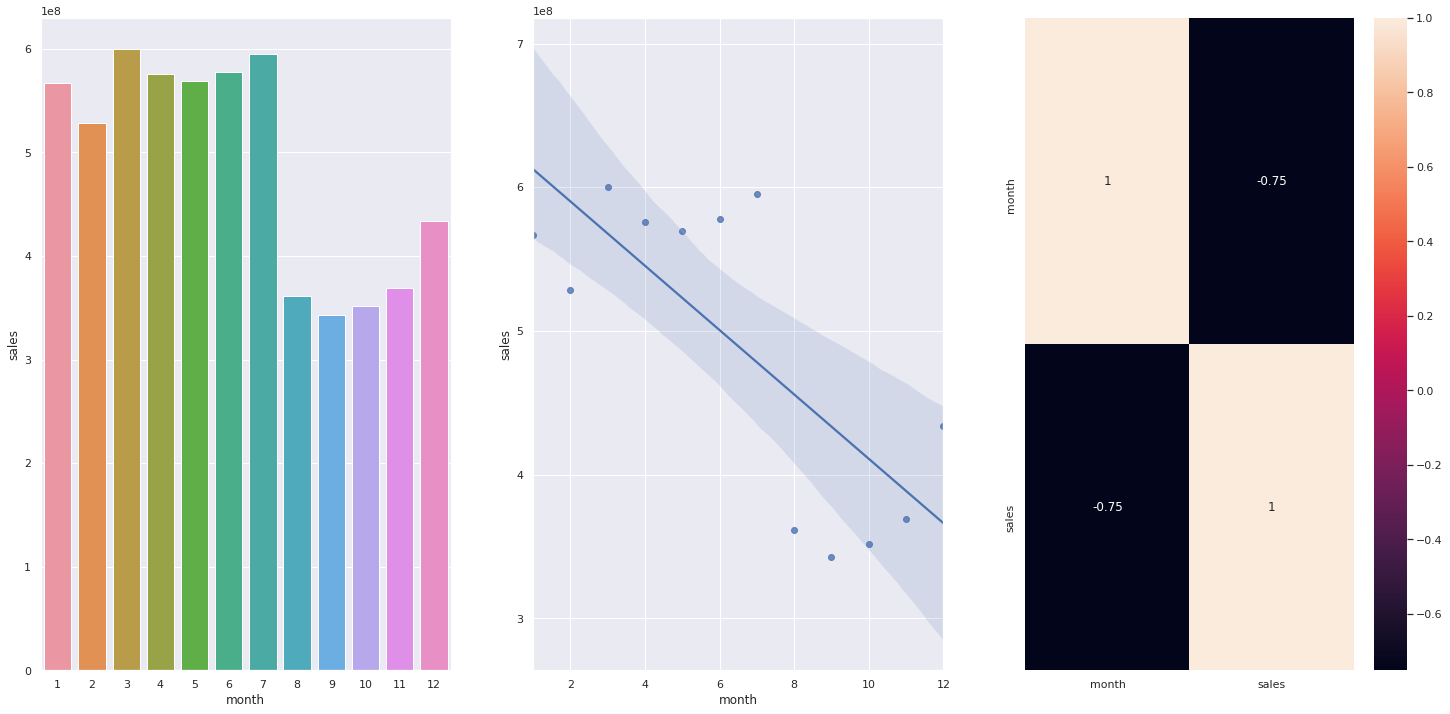

In [68]:
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()

plt.subplot( 1,3,1)
sns.barplot( x= 'month', y = 'sales', data = aux1);

plt.subplot( 1,3,2)
sns.regplot( x= 'month', y = 'sales', data = aux1);

plt.subplot( 1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True);

### H10. Sales should encrease after the 10th day of every month.
**TRUE** Sales encrease after the 10th day

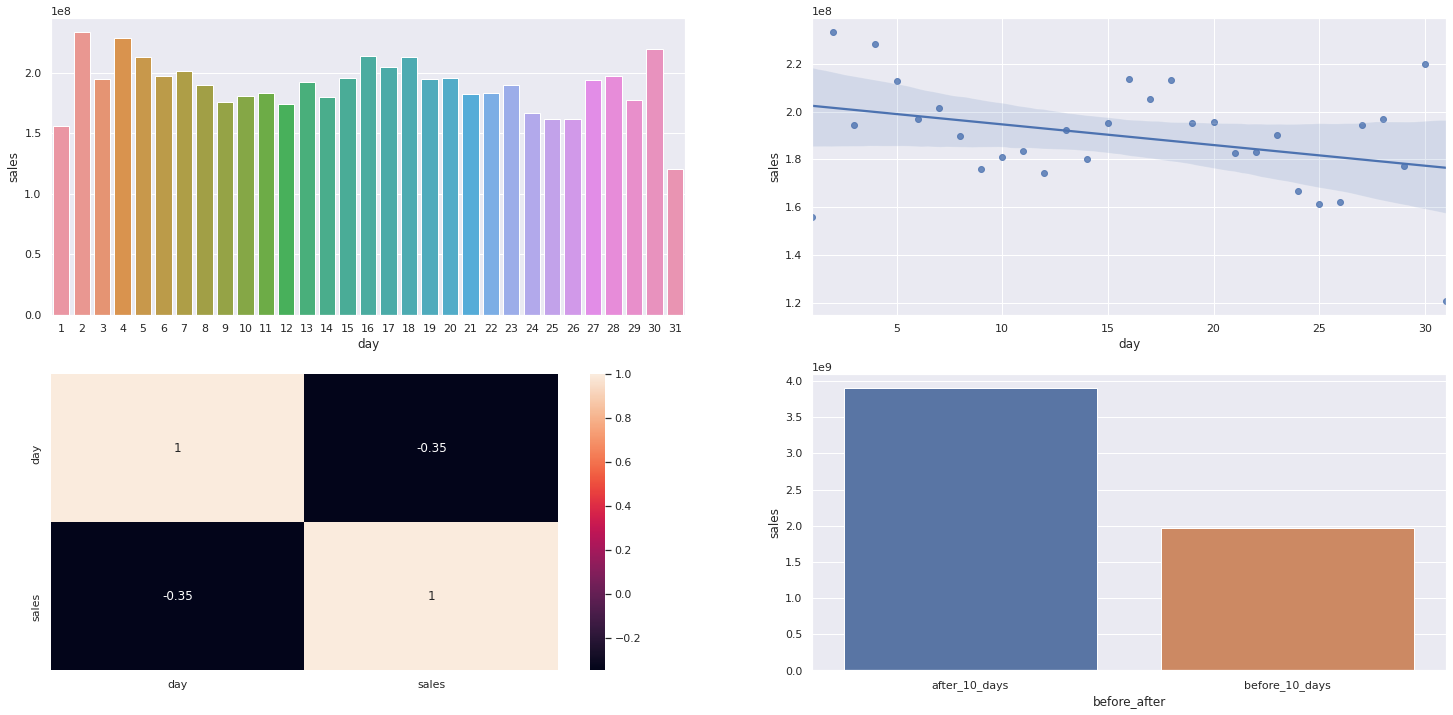

In [75]:
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

plt.subplot( 2,2,1)
sns.barplot( x= 'day', y = 'sales', data = aux1);

plt.subplot( 2,2,2)
sns.regplot( x= 'day', y = 'sales', data = aux1);

plt.subplot( 2,2,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True);

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()

plt.subplot( 2,2,4)
sns.barplot( x = 'before_after', y = 'sales', data = aux2);

### H11. Sales should decrease on weekends.
**TRUE** Sales decrease on weekends

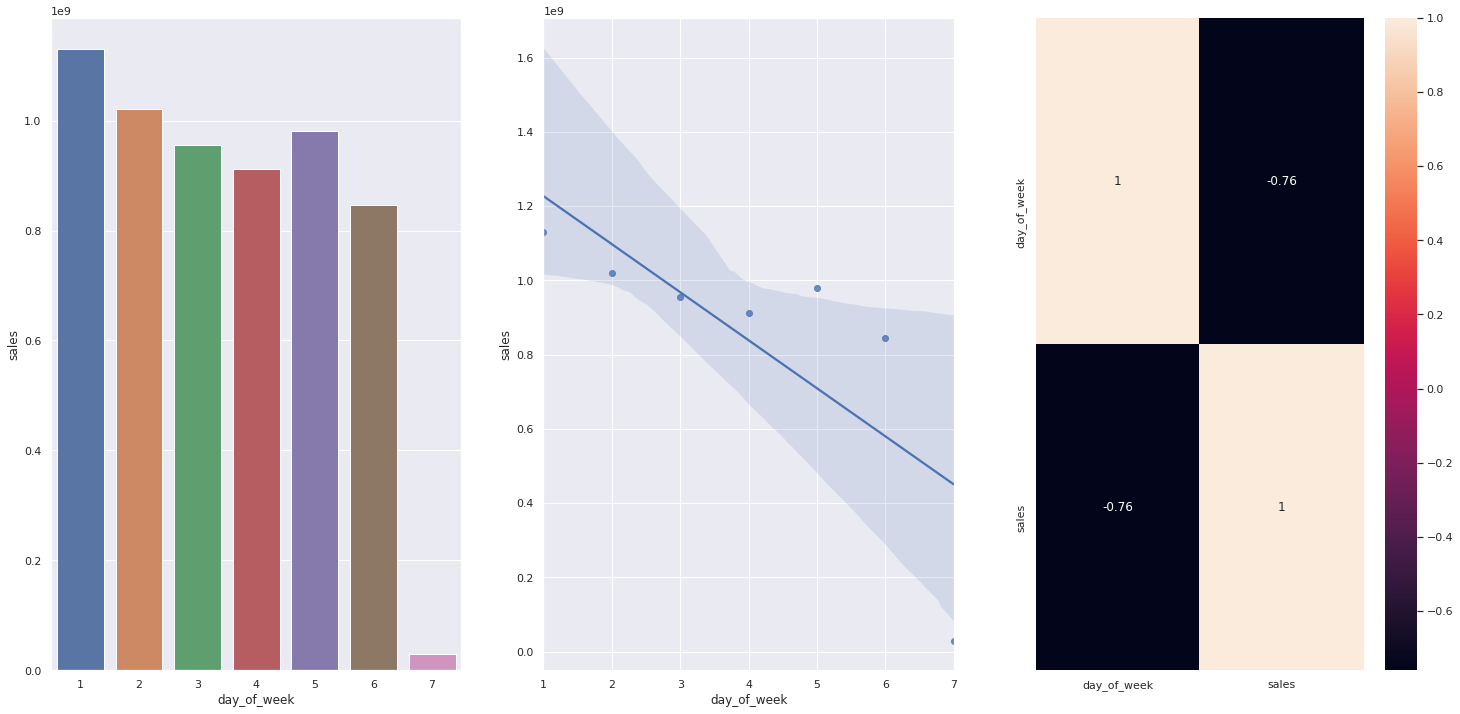

In [74]:
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.subplot( 1,3,1)
sns.barplot( x= 'day_of_week', y = 'sales', data = aux1);

plt.subplot( 1,3,2)
sns.regplot( x= 'day_of_week', y = 'sales', data = aux1);

plt.subplot( 1,3,3)
sns.heatmap( aux1.corr( method = 'pearson'), annot = True);

### H12. Sales should decrease on school holidays.
**TRUE** Sales decrease on school holidays 

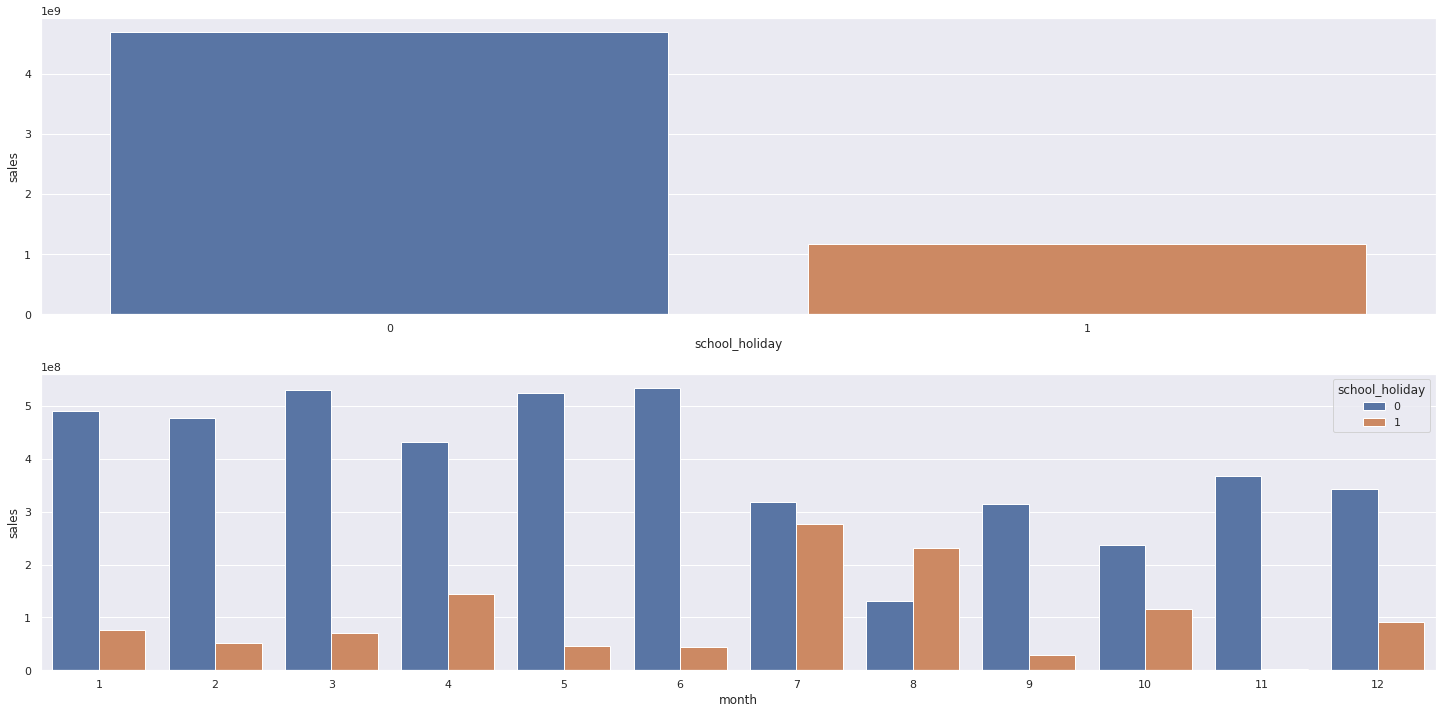

In [81]:
plt.subplot( 2,1,1)
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()
sns.barplot( x= 'school_holiday', y = 'sales', data = aux1);



plt.subplot( 2,1,2)
aux2 = df4[['month','school_holiday', 'sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot( x= 'month', y = 'sales', hue = 'school_holiday', data = aux2);




### 4.2.1 Hypostesis Summary

In [83]:
from tabulate import tabulate

In [85]:
tab = [['Hypotesis', 'Conclution', 'Correlation'],
       ['H1','False','Low'],
       ['H2','False','Medium'],
       ['H3','False','Medium'],
       ['H4','False','Low'],
       ['H5','-','-'],
       ['H6','False','Low'],
       ['H7','False','Medium'],
       ['H8','False','High'],
       ['H9','False','High'],
       ['H10','True','High'],
       ['H11','True','High'],
       ['H12','True','ow'],
      ]

print( tabulate( tab, headers = 'firstrow'))

Hypotesis    Conclution    Correlation
-----------  ------------  -------------
H1           False         Low
H2           False         Medium
H3           False         Medium
H4           False         Low
H5           -             -
H6           False         Low
H7           False         Medium
H8           False         High
H9           False         High
H10          True          High
H11          True          High
H12          True          ow


## 4.3 Multivariate Analysis